### Задание

Дан файл HR.csv с данными по опросу уровня удовлетворенности сотрудниками работой.
Файл доступен тут -
https://drive.google.com/file/d/1INgo03nal-vwFJe7Lec5vOUtOwfJdUr1/view?usp=sharing

Признаки:
1. satisfaction_level - Уровень удовлетворенности работой
2. Last_evaluation - Время с момента последней оценки в годах
3. number_projects - Количество проектов, выполненных за время работы
4. average_monthly_hours - Среднее количество часов на рабочем месте в месяц
5. time_spend_company - Стаж работы в компании в годах
6. work_accident - Происходили ли несчастные случаи на рабочем месте с сотрудником
7. left - уволился ли сотрудник
8. promotion_last_5years - повышался ли сотрудник за последние пять лет
9. department - отдел в котором работает сотрудник
10. salary - относительный уровень зарплаты



In [5]:
import pandas as pd
import seaborn as sns

### 1. Загрузить файл в pandas dataframe (5 б.)

In [6]:
data_frame = pd.read_csv('HR.csv', encoding = 'utf8')

data_frame['counter'] = 1
data_frame['counter'] = data_frame['counter'].cumsum()
data_frame.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary,counter
0,0.38,0.53,2,157,3,0,1,0,sales,low,1
1,0.80,0.86,5,262,6,0,1,0,sales,medium,2
2,0.11,0.88,7,272,4,0,1,0,sales,medium,3
3,0.72,0.87,5,223,5,0,1,0,sales,low,4
4,0.37,0.52,2,159,3,0,1,0,sales,low,5


### 2. Рассчитайте основные статистики для переменных (10 б.)

In [7]:
data_frame.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,counter
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268,7500.000000
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281,4329.982679
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000,1.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000,3750.500000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000,7500.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000,11249.500000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000,14999.000000


In [8]:
data_frame.mode()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary,counter
0,0.1,0.55,4.0,135.0,3.0,0.0,0.0,0.0,sales,low,1
1,NaN,NaN,NaN,156.0,NaN,NaN,NaN,NaN,NaN,NaN,2
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5
...,...,...,...,...,...,...,...,...,...,...,...
14994,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14995
14995,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14996
14996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14997
14997,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14998


### 3. Рассчитайте и визуализировать корреляционную матрицу для количественных переменных. Определите две самые скоррелированные и две наименее скоррелированные переменные. (10 б.)


In [9]:
# sns.pairplot(data_frame)

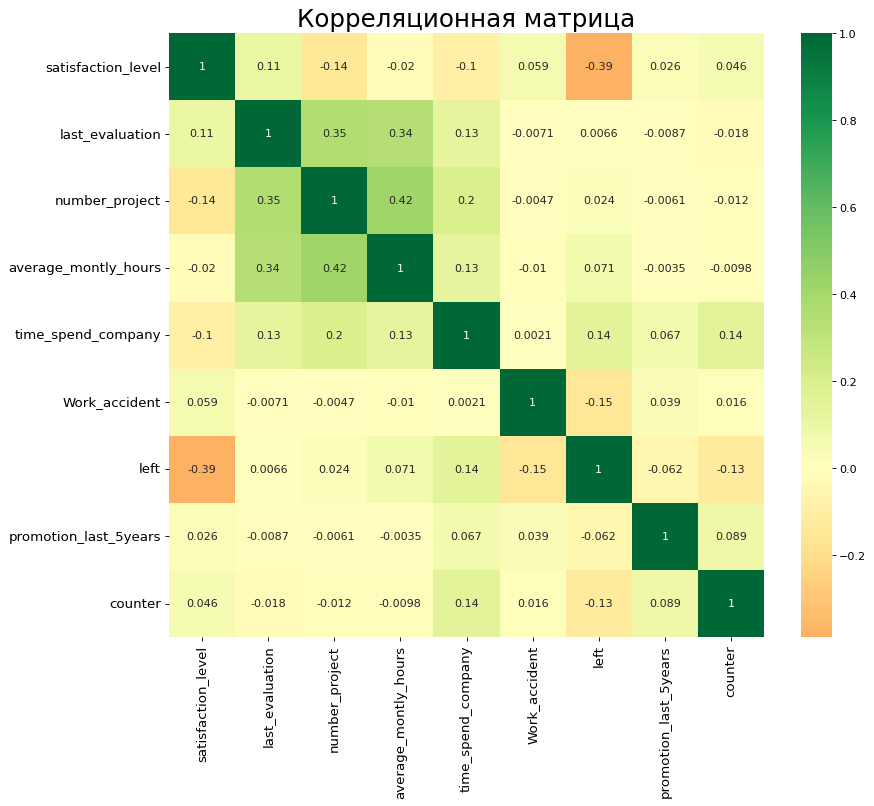

Наиболее заивисмые переменные это Кол-во проектов и Кол-часов в месяц
Наименее заивисмые переменные это Флаг уволившися и Уроввень удовлетворенности 


In [10]:
from matplotlib import pyplot as plt


plt.figure(figsize=(12,10), dpi= 80)
sns.heatmap(data_frame.corr(), xticklabels=data_frame.corr().columns, yticklabels=data_frame.corr().columns, cmap='RdYlGn', center=0, annot=True)
plt.title('Корреляционная матрица', fontsize=22)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.show()

print('Наиболее заивисмые переменные это Кол-во проектов и Кол-часов в месяц')
print('Наименее заивисмые переменные это Флаг уволившися и Уроввень удовлетворенности ')

### 4. Рассчитайте сколько сотрудников работает в каждом департаменте. (5 б.)

In [11]:
data_frame.groupby(by = 'department').count().reset_index()[['department','counter']]

,department,counter
0,IT,1227
1,RandD,787
2,accounting,767
3,hr,739
4,management,630
5,marketing,858
6,product_mng,902
7,sales,4140
8,support,2229
9,technical,2720


### 6. Показать распределение сотрудников по зарплатам в каждом департаменте по отдельности (5 б.)

In [12]:
data_frame.groupby( by =['department','salary']).count().reset_index()[['department','salary','counter']].head()

,department,salary,counter
0,IT,high,83
1,IT,low,609
2,IT,medium,535
3,RandD,high,51
4,RandD,low,364


### 7. Проверить гипотезу, что сотрудники с высоким окладомпроводят на работе больше времени, чем сотрудники с низким окладом. (10 б.)



In [13]:

data_frame[data_frame['salary'].isin(['high','low'])].groupby(by='salary').mean().reset_index()[['salary','average_montly_hours']]

,salary,average_montly_hours
0,high,199.867421
1,low,200.996583


### 8. Рассчитать следующие показатели среди уволившихся и неуволившихся сотрудников (по отдельности) (10 б.)

● Доля сотрудников с повышением за последние 5 лет

● Средняя степень удовлетворенности

● Cреднее количество проектов

### Доля сотрудников с повышением за последние 5 лет

In [14]:

data_frame[data_frame['left']==0].counter.count()
sat = data_frame[data_frame['left']==0].groupby(by = 'promotion_last_5years').count().reset_index()[['promotion_last_5years','counter']]
sat['total_empl'] =data_frame[data_frame['left']==0].counter.count()
sat['share'] =sat['counter']/sat['total_empl']*100
print(sat)

data_frame[data_frame['left']==1].counter.count()
sat2 = data_frame[data_frame['left']==1].groupby(by = 'promotion_last_5years').count().reset_index()[['promotion_last_5years','counter']]
sat2['total_empl'] =data_frame[data_frame['left']==1].counter.count()
sat2['share'] =sat2['counter']/sat2['total_empl']*100
print(sat2)

   promotion_last_5years  counter  total_empl      share
0                      0    11128       11428  97.374869
1                      1      300       11428   2.625131
   promotion_last_5years  counter  total_empl      share
0                      0     3552        3571  99.467936
1                      1       19        3571   0.532064


### Средняя степень удовлетворенности

In [15]:
a = data_frame[data_frame['left']==0].satisfaction_level.mean()*100
b = data_frame[data_frame['left']==1].satisfaction_level.mean()*100

print(f'Средний уровень удовлетворенности у не уволившихся сотрудников {round(a,2)}%')
print(f'Средний уровень удовлетворенности у уволившихся сотрудников {round(b,2)}%')

Средний уровень удовлетворенности у не уволившихся сотрудников 66.68%
Средний уровень удовлетворенности у уволившихся сотрудников 44.01%


### Среднее количество проектов

In [16]:
a = data_frame[data_frame['left']==0].number_project.mean()
b = data_frame[data_frame['left']==1].number_project.mean()

print(f'Среднее кол-во проектов у не уволившихся сотрудников {round(a,2)}')
print(f'Среднее кол-во проектов у уволившихся сотрудников {round(b,2)}')

Среднее кол-во проектов у не уволившихся сотрудников 3.79
Среднее кол-во проектов у уволившихся сотрудников 3.86
